# <center>Application of Time Series Forecasting in Real Estate Valuation </center>
## <center> Notebook 1: EDA & Feature Engineering</center>


### Notebook Content:

<a href='#Destination_1'>1. Import Libraries</a><br>

<a href='#Destination_2'>2. Statistical Review </a>

<a href='#Destination_3'>3. Creating the quarterly 'Housing CPI' feature </a><br>

<a href='#Destination_4'>4. Constructing 2 features from discrete variables </a><br>

<a href='#Destination_5'>5. Constructing 2 features from continuous variables </a><br>

<a href='#Destination_6'>6. Review of feature importance </a><br>


<a id='Destination_1'></a>
# 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import seaborn as sns

In [3]:
df = pd.read_csv('./Tokyo_Trades.csv')

df = df[["TradePrice","Area","MinTimeToNearestStation","Year","Quarter","Type","CityPlanning","DistrictName"]].dropna(how='any',axis=0).reset_index(drop=True)

display(df.head())
df.shape

,TradePrice,Area,MinTimeToNearestStation,Year,Quarter,Type,CityPlanning,DistrictName
0,40000000,30,4.0,2019,3,"Pre-owned Condominiums, etc.",Commercial Zone,Iidabashi
1,130000000,80,4.0,2019,3,"Pre-owned Condominiums, etc.",Commercial Zone,Iidabashi
2,400000000,110,2.0,2019,2,Residential Land(Land and Building),Commercial Zone,Iidabashi
3,180000000,50,1.0,2019,2,Residential Land(Land and Building),Commercial Zone,Iidabashi
4,100000000,65,4.0,2019,2,"Pre-owned Condominiums, etc.",Commercial Zone,Iidabashi


(394079, 8)

<a id='Destination_2'></a>
# 2. Statistical Review 
In this section we try to analyze the distribution of some columns and identify the outliers and check what sort of statistical treatment the dataset might need. 

- Continous columns
- Discrete columns 

#### Continous columns

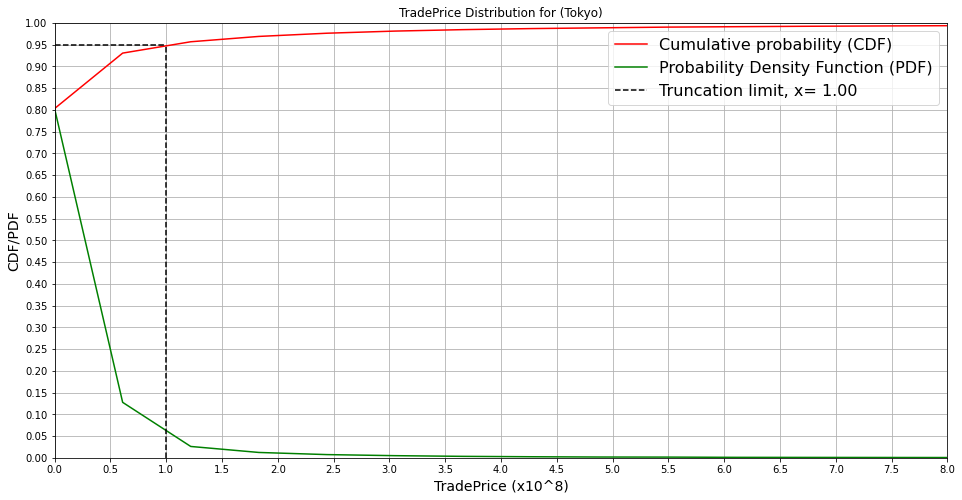

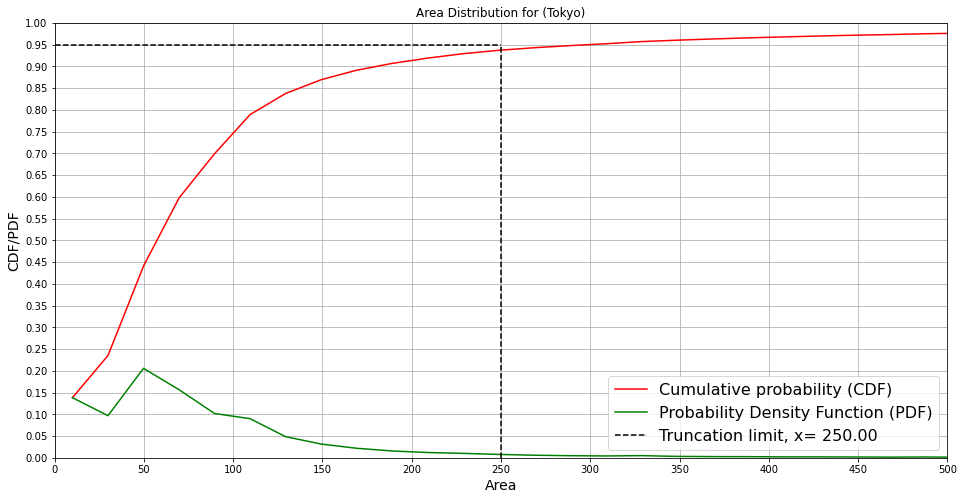

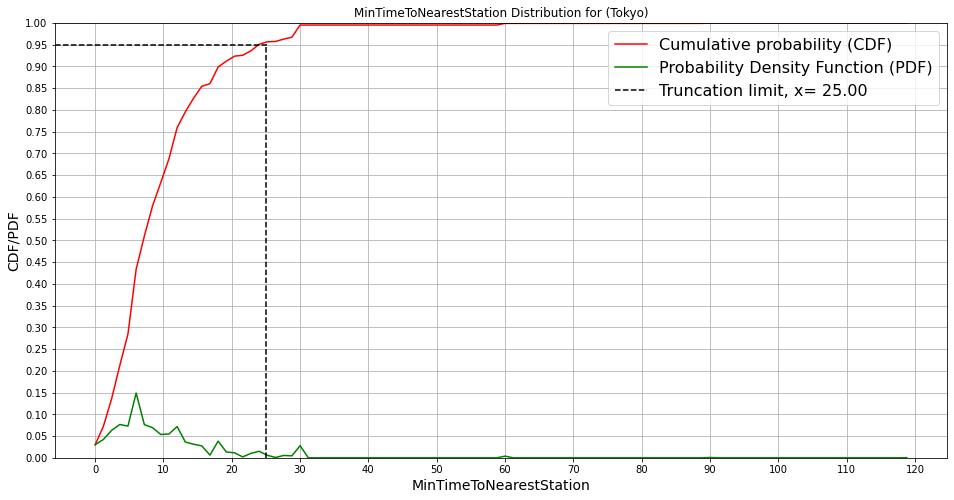

In [3]:
sample_size = len(df)

    # Price Distribtion

# make a histogram
frequency, bins = np.histogram(df['TradePrice'].values, bins=1000, density=True)

# probability 
prob = frequency/np.sum(frequency)


# plot
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(bins[:-1]/1e8,np.cumsum(prob),'-',color='red', label='Cumulative probability (CDF)')
plt.plot(bins[:-1]/1e8,prob,'-',color='g', label='Probability Density Function (PDF)')
ax.set_title('TradePrice Distribution for (Tokyo)')
ax.set_ylabel('CDF/PDF',fontsize=14)
ax.set_xlabel('TradePrice (x10^8)',fontsize=14)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
plt.ylim(0,np.max(np.cumsum(prob)))
plt.xlim(0,8)
plt.axvline(x = 1,ymax=0.95, linestyle = 'dashed', color = 'k', label = 'Truncation limit, x= '+format(1,'.2f'))
plt.axhline(y = 0.95, xmax=1/8, linestyle = 'dashed', color = 'k')
plt.grid()
plt.legend(prop={'size': 16}) 
plt.show()

    # Area Distribution

frequency, bins = np.histogram(df['Area'].values, bins=100,density =True)

# probability 
prob = frequency/np.sum(frequency)

# plot
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(bins[:-1],np.cumsum(prob),'-',color='red', label='Cumulative probability (CDF)')
plt.plot(bins[:-1],prob,'-',color='g', label='Probability Density Function (PDF)')
ax.set_title('Area Distribution for (Tokyo)')
ax.set_ylabel('CDF/PDF',fontsize=14)
ax.set_xlabel('Area',fontsize=14)
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
plt.ylim(0,np.max(np.cumsum(prob)))
plt.xlim(0,500)
plt.axvline(x = 250,ymax=0.95, linestyle = 'dashed', color = 'k', label = 'Truncation limit, x= '+format(250,'.2f'))
plt.axhline(y = 0.95, xmax=250/500, linestyle = 'dashed', color = 'k')
plt.grid()
plt.legend(prop={'size': 16}) 
plt.show()


    # MinTimeToNearestStation
frequency, bins = np.histogram(df['MinTimeToNearestStation'].values, bins=100, density=True)

# probability 
prob = frequency/np.sum(frequency)

# plot
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(bins[:-1],np.cumsum(prob),'-',color='red', label='Cumulative probability (CDF)')
plt.plot(bins[:-1],prob,'-',color='g', label='Probability Density Function (PDF)')
ax.set_title('MinTimeToNearestStation Distribution for (Tokyo)')
ax.set_ylabel('CDF/PDF',fontsize=14)
ax.set_xlabel('MinTimeToNearestStation',fontsize=14)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
plt.ylim(0,np.max(np.cumsum(prob)))
plt.axvline(x = 25,ymax=0.95, linestyle = 'dashed', color = 'k', label = 'Truncation limit, x= '+format(25,'.2f'))
plt.axhline(y = 0.95, xmax=25/105, linestyle = 'dashed', color = 'k')
plt.grid()
plt.legend(prop={'size': 16}) 
plt.show()

In order to ensure the relaiablity of modeling, it might be smart to remove the tails of the distributions. 
Because instances at the tails are under-represented anyway.

#### Discrete columns

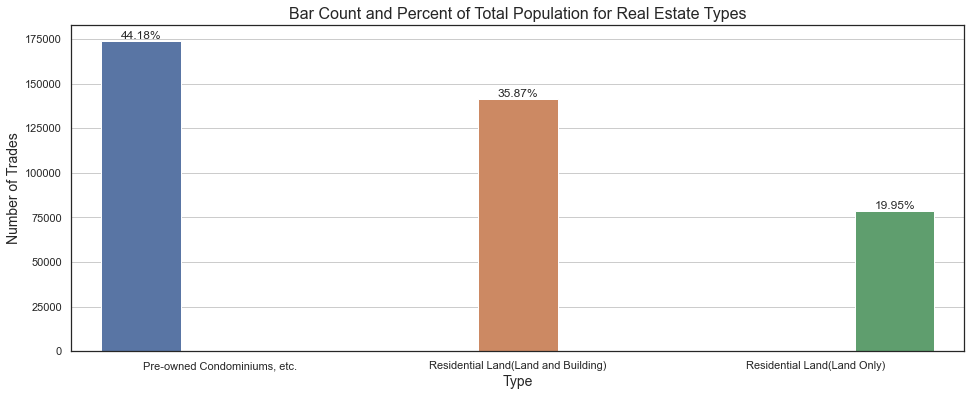

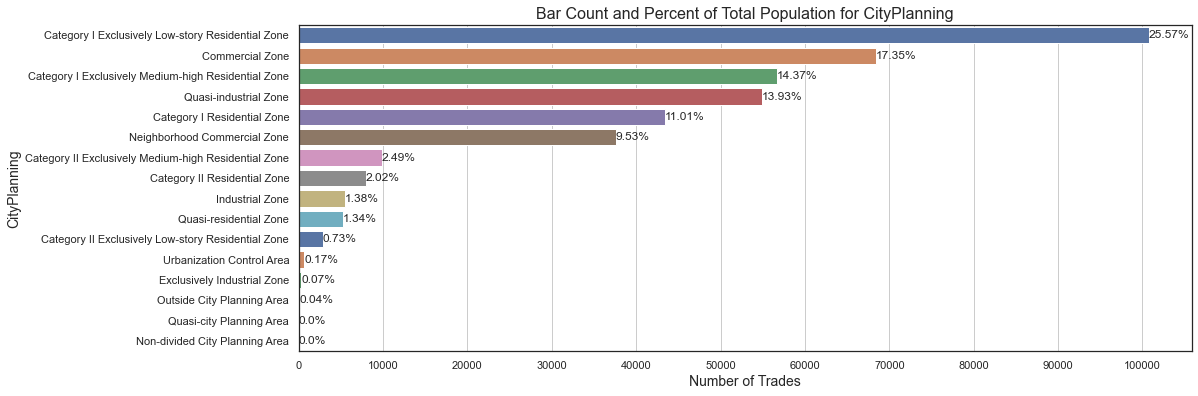

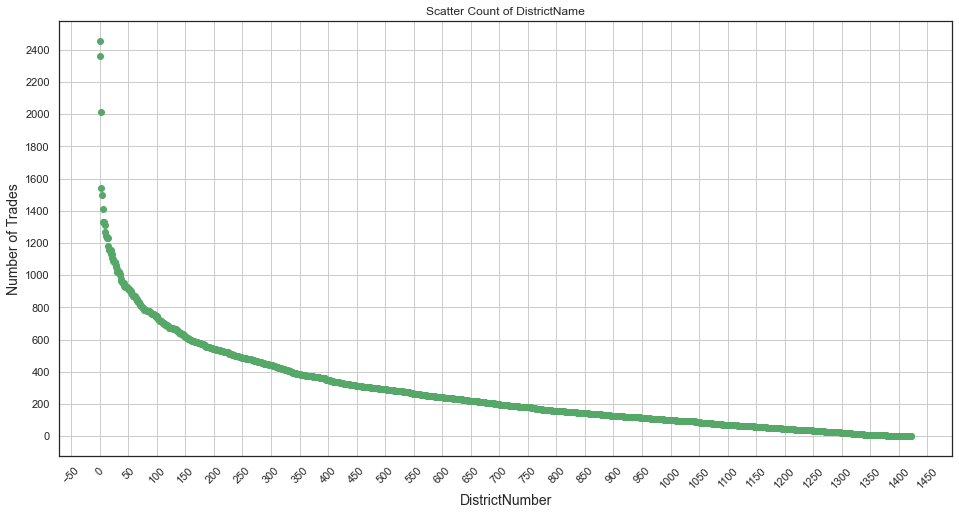

In [4]:
    # Type
frequency = {char: df.loc[df['Type']==char].shape[0] for char in df['Type'].unique()}
percentage = np.array([frequency[key]*100/df.shape[0] for key in frequency]).round(2)
count = np.array([frequency[key] for key in frequency])
# plot 
sns.set(style='white')
plot_df = pd.DataFrame({'Type':df['Type'].unique(), 'percentage':percentage,'count':count}).sort_values(by=['percentage'],ascending=False)
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Type', y='count',data=plot_df,hue='Type', palette = sns.color_palette())

bars = [str(value)+'%' for value in plot_df['percentage']]
for c in ax.containers:
     ax.bar_label(c,labels=bars, label_type='edge')

ax.set_title('Bar Count and Percent of Total Population for Real Estate Types',fontsize=16)
ax.set_ylabel('Number of Trades',fontsize=14)
ax.set_xlabel('Type',fontsize=14)
# ax.yaxis.set_major_locator(MultipleLocator(0.05)) 
plt.legend([],[],frameon=False)
plt.grid(axis='y')


    # CityPlanning
frequency = {char: df.loc[df['CityPlanning']==char].shape[0] for char in df['CityPlanning'].unique()}
percentage = np.array([frequency[key]*100/df.shape[0] for key in frequency]).round(2)
count = np.array([frequency[key] for key in frequency])
plot_df = pd.DataFrame({'CityPlanning':df['CityPlanning'].unique(), 'percentage':percentage,'count':count}).sort_values(by=['percentage'],ascending=False,axis=0)

fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='count', y='CityPlanning',data=plot_df,hue='CityPlanning', orient = 'h', palette = sns.color_palette(),dodge=False)

bars = [str(value)+'%' for value in plot_df['percentage']]
for c in ax.containers:
     ax.bar_label(c,labels=bars, label_type='edge')
        
ax.set_title('Bar Count and Percent of Total Population for CityPlanning',fontsize=16)
ax.set_ylabel('CityPlanning',fontsize=14)
ax.set_xlabel('Number of Trades',fontsize=14)
ax.xaxis.set_major_locator(MultipleLocator(10000)) 
plt.legend([],[],frameon=False)
plt.grid(axis='x')

    # DistrictName
DistrictName_counts = df.groupby('DistrictName')['DistrictName'].count().sort_values(ascending=False).values
axis = np.arange(len(DistrictName_counts))

# plot
fig, ax = plt.subplots(figsize=(16,8))
plt.scatter(axis,DistrictName_counts,color='g')
ax.set_title('Scatter Count of DistrictName')
ax.set_ylabel('Number of Trades',fontsize=14)
ax.set_xlabel('DistrictNumber',fontsize=14)
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(200))
plt.grid()
plt.xticks(rotation=45)
plt.show()

In the first plot, regarding the 3 different types of real estate, they are balanced in terms of porportion of the population. But looking at second plot, in the distribution of 'CityPlanning' there are a few categories that are under-represented. It may be a good idea to discard these categories. 

As for the third plot, in the count scatter for 'DistrictName' we find there are more than 1400 districts, and with the total number of trades being around 400k, this results in a relatively low representation for a considerable number of districts. This issue of low representation can be overcome by investigating similarities between districts in terms of trade price, and thus creating a feature that captures the price behavior with respect to the district. We will work this out in the coming sections. 

Based on the assesment above, we will do the following: 
- discard the categories of city planning that comprise less than 0.5% of the population.
- discard the tails of the distribtions and keep the 95% for the continous columns ['TradePrice','Area','MinTimeToNearestStation']


In [5]:
CityPlanning_percentages = df.groupby('CityPlanning')['CityPlanning'].count()/len(df)*100
# categories to be dropped
drop_categories = CityPlanning_percentages[CityPlanning_percentages<0.5]
drop_index  = df[df['CityPlanning'].isin(drop_categories.index.tolist())].index.tolist()
print('The dropped CityPlanning categories and their percentage:')
display(drop_categories)
df = df.drop(drop_index,axis=0)

The dropped CityPlanning categories and their percentage:


CityPlanning
Exclusively Industrial Zone       0.074097
Non-divided City Planning Area    0.000508
Outside City Planning Area        0.035018
Quasi-city Planning Area          0.001269
Urbanization Control Area         0.165703
Name: CityPlanning, dtype: float64

In [6]:
# remove distribution tails for continous feature
df = df.loc[df["TradePrice"]<1e8].loc[df["Area"]<250].loc[df["MinTimeToNearestStation"]<25]
display(df.head())
df.shape

,TradePrice,Area,MinTimeToNearestStation,Year,Quarter,Type,CityPlanning,DistrictName
0,40000000,30,4.0,2019,3,"Pre-owned Condominiums, etc.",Commercial Zone,Iidabashi
5,24000000,35,3.0,2018,4,"Pre-owned Condominiums, etc.",Commercial Zone,Iidabashi
6,13000000,20,4.0,2018,3,"Pre-owned Condominiums, etc.",Commercial Zone,Iidabashi
8,22000000,30,3.0,2018,2,"Pre-owned Condominiums, etc.",Commercial Zone,Iidabashi
9,69000000,70,1.0,2018,2,"Pre-owned Condominiums, etc.",Commercial Zone,Iidabashi


(328249, 8)

<a id='Destination_3'></a>

# 3. Create the quarterly 'Housing CPI' feature
    - read the housing consumer price index dataframe.
    - initialize the feature column. 
    - loop over all quarters in all years and:
        - locate instances in that quarter.
        - add the respective CPI value to 'HousingCPI' in that quarter.

In [7]:
cpi = pd.read_csv('./Housing CPI.csv')
display(cpi.head())
cpi.shape

,HousingCPI,Year,Quarter
0,101.500000,2005,1
1,101.500000,2005,2
2,101.433333,2005,3
3,101.533333,2005,4
4,101.600000,2006,1


(60, 3)

In [8]:
# initialize the feature column
df['HousingCPI'] = 0.0

In [9]:
for year in df['Year'].unique():
    
    for Q in df['Quarter'].unique():
        
        # locate instances in that quarter
        temp_df = df['HousingCPI'].loc[df['Year']==year].loc[df['Quarter']==Q]
        
        # locate CPI value in that quarter
        value = cpi['HousingCPI'].loc[cpi['Year']==year].loc[cpi['Quarter']==Q].values[0]
        
        # add the respective CPI value to 'HousingCPI' in that quarter
        df.loc[temp_df.index,'HousingCPI'] = value

In [10]:
display(df.head())
df.shape

,TradePrice,Area,MinTimeToNearestStation,Year,Quarter,Type,CityPlanning,DistrictName,HousingCPI
0,40000000,30,4.0,2019,3,"Pre-owned Condominiums, etc.",Commercial Zone,Iidabashi,99.8
5,24000000,35,3.0,2018,4,"Pre-owned Condominiums, etc.",Commercial Zone,Iidabashi,99.6
6,13000000,20,4.0,2018,3,"Pre-owned Condominiums, etc.",Commercial Zone,Iidabashi,99.6
8,22000000,30,3.0,2018,2,"Pre-owned Condominiums, etc.",Commercial Zone,Iidabashi,99.6
9,69000000,70,1.0,2018,2,"Pre-owned Condominiums, etc.",Commercial Zone,Iidabashi,99.6


(328249, 9)

<a id='Destination_4'></a>


# 4. Constructing 2 features from discrete variables

    Constructing 2 features that capture the average price behavior with respect to 2 discrete variables.For the 2 features 'DistrictName' & 'CityPlanning' the following is done: 

    - initialize the new feature column.
    - loop over all quarters in all years for every specific discrete value and:
        - locate instances in that quarter of that year for that specific discrete value.
        - calculate the mean 'TradePrice' for those intances.
        - add the respective mean trade value to its respective feature column.

In [11]:
# initialize feature Column 
df['DistrictAvgPriceByQuarter'] = 0.0

In [12]:
for year in df['Year'].unique():

     for quarter in df['Quarter'].unique():

        for district in df['DistrictName'].unique():
            
            # locate instances in that quarter of that year for that specific district
            temp_df = df.loc[df['Year']==year].loc[
                df['Quarter']==quarter].loc[df['DistrictName']==district]
            
            # calculate the mean 'TradePrice' for those intances 
            mean_price = temp_df['TradePrice'].mean()

            # add the respective mean trade value to its respective feature column
            df.loc[temp_df.index,'DistrictAvgPriceByQuarter'] = mean_price


In [13]:
# initialize feature Column 
df['CityPlanningAvgPriceByQuarter'] = 0.0

In [14]:
for year in df['Year'].unique():

    for quarter in df['Quarter'].unique():

        for CityPlanning in df['CityPlanning'].unique():

            # locate instances in that quarter of that year for that specific CityPlanning
            temp_df = df.loc[df['Year']==year].loc[
                df['Quarter']==quarter].loc[df['CityPlanning']==CityPlanning]

            # calculate the mean 'TradePrice' for those intances 
            mean_price = temp_df['TradePrice'].mean()

            # add the respective mean trade value to its respective feature column
            df.loc[temp_df.index,'CityPlanningAvgPriceByQuarter'] = mean_price

<a id='Destination_5'></a>



# 5. Constructing 2 features from continuous variables


    Creating 2 features that capture the average price behavior with respect to 2 continuous variables. For the 2 features 'Area' & 'MinTimeToNearestStation' the following is done: 
    - initialize the feature column.
    - find the best values to group the continous variables by:
        - finding the threshold values of 'Area' & 'MinTimeToNearestStation'
        - finding the binwidth by taking the difference between 2 consecutive threshold values.
        - creating a histogram.
        - locate the bins where the frequency count is > 0 (those bins represent the availbe groups).
   
    - loop over all quarters in all years for every bin and:
        - locate instances in that quarter of that year for that specific bin.
        - calculate the mean 'TradePrice' for those intances.
        - add the respective mean trade value to its respective feature column.

In [15]:
# initialize feature column
df['AreaAvgPriceByQuarter'] = 0.0

In [16]:
# find threshold values 
Areas = df.groupby('Area')['TradePrice'].count().index

# set binwidth
BinWidth= Areas[1]-Areas[0]

# number of bins
n_of_bins = int((Areas[-1]-Areas[0])/BinWidth)

# make a histogram
frequency,bins=np.histogram(df.Area,n_of_bins)
bins =bins[1:]

# find the bins with frequency count > 0
none_0bins=bins[frequency!=0]
  
for year in df['Year'].unique():

    for quarter in df['Quarter'].unique():

        for i, Area in enumerate(none_0bins):

            # locate instances in that quarter of that year for that specific bin
            temp_df = df.loc[df['Year']==year].loc[
                df['Quarter']==quarter].loc[df['Area']<=Area]
            if i>0:
                temp_df = temp_df.loc[temp_df['Area']>none_0bins[i-1]]

            # calculate the mean 'TradePrice' for those intances 
            mean_price = temp_df['TradePrice'].mean()

            #dd the respective mean trade value to its respective feature column
            df.loc[temp_df.index,'AreaAvgPriceByQuarter'] = mean_price

In [17]:
# initialize feature column
df['MinTimeAvgPriceByQuarter'] = 0.0

In [18]:
# find threshold values 
times = df.groupby('MinTimeToNearestStation')['TradePrice'].count().index

# set binwidth
BinWidth= times[1]-times[0]

# number of bins
n_of_bins = int((times[-1]-times[0])/BinWidth)

# make a histogram
frequency,bins=np.histogram(df['MinTimeToNearestStation'],n_of_bins)
bins =bins[1:]

# find the bins with frequency count > 0
none_0bins=bins[frequency!=0]


for year in df['Year'].unique():

    for quarter in df['Quarter'].unique():

        for i, time in enumerate(none_0bins):

            # locate instances in that quarter of that year for that specific bin
            temp_df = df.loc[df['Year']==year].loc[
                df['Quarter']==quarter].loc[df['MinTimeToNearestStation']<=time]
            if i>0:
                temp_df = temp_df.loc[temp_df['MinTimeToNearestStation']>none_0bins[i-1]]

            # calculate the mean 'TradePrice' for those intances 
            mean_price = temp_df['TradePrice'].mean()

            #dd the respective mean trade value to its respective feature column
            df.loc[temp_df.index,'MinTimeAvgPriceByQuarter'] = mean_price

In [19]:
display(df.head())
df.shape

,TradePrice,Area,MinTimeToNearestStation,Year,Quarter,Type,CityPlanning,DistrictName,HousingCPI,DistrictAvgPriceByQuarter,CityPlanningAvgPriceByQuarter,AreaAvgPriceByQuarter,MinTimeAvgPriceByQuarter
0,40000000,30,4.0,2019,3,"Pre-owned Condominiums, etc.",Commercial Zone,Iidabashi,99.8,3.200000e+07,3.267775e+07,2.590896e+07,3.479964e+07
5,24000000,35,3.0,2018,4,"Pre-owned Condominiums, etc.",Commercial Zone,Iidabashi,99.6,3.900000e+07,3.204836e+07,2.786471e+07,3.632381e+07
6,13000000,20,4.0,2018,3,"Pre-owned Condominiums, etc.",Commercial Zone,Iidabashi,99.6,1.933333e+07,3.299709e+07,2.023154e+07,3.766148e+07
8,22000000,30,3.0,2018,2,"Pre-owned Condominiums, etc.",Commercial Zone,Iidabashi,99.6,4.825000e+07,3.350125e+07,2.710536e+07,3.573333e+07
9,69000000,70,1.0,2018,2,"Pre-owned Condominiums, etc.",Commercial Zone,Iidabashi,99.6,4.825000e+07,3.350125e+07,4.549386e+07,3.516614e+07


(328249, 13)

<a id='Destination_6'></a>


# 6. Review of Feature importance
    - Map the discrete features ['Type', 'CityPlanning', 'DistrictName'] into integeres (the mapping better be in ascending order based on the average price)
    - Conduct PCA to check feature importance.
    - save the dataframe 'df' with the newly created features, in order to be used for the upcoming work

In [20]:
#initialize
cols = ['Type','CityPlanning','DistrictName']
discrete_featues = pd.DataFrame(df[cols], columns = cols)
mapping_indecies = {}
# loop over discrete features to map 
for feat in cols:

    # sort discrete values based on their average tradeprice
    sorted_indecies = pd.Series({value : df['TradePrice'].loc[df[feat]==value].mean()
                                     for value in df[feat].unique()}).sort_values().index
    # save mapping_indecies
    mapping_indecies[feat]=sorted_indecies
    # map each index to an integer i, remeber indecies here are the discrete values a feature
    for i, index in enumerate(sorted_indecies):
        discrete_featues[feat].loc[discrete_featues[feat]==index]= i+1 #start from i=1  

In [21]:
data_df = pd.concat([df.drop(cols,axis=1),discrete_featues],axis=1)
display(data_df.head())
data_df.shape

,TradePrice,Area,MinTimeToNearestStation,Year,Quarter,HousingCPI,DistrictAvgPriceByQuarter,CityPlanningAvgPriceByQuarter,AreaAvgPriceByQuarter,MinTimeAvgPriceByQuarter,Type,CityPlanning,DistrictName
0,40000000,30,4.0,2019,3,99.8,3.200000e+07,3.267775e+07,2.590896e+07,3.479964e+07,1,2,1181
5,24000000,35,3.0,2018,4,99.6,3.900000e+07,3.204836e+07,2.786471e+07,3.632381e+07,1,2,1181
6,13000000,20,4.0,2018,3,99.6,1.933333e+07,3.299709e+07,2.023154e+07,3.766148e+07,1,2,1181
8,22000000,30,3.0,2018,2,99.6,4.825000e+07,3.350125e+07,2.710536e+07,3.573333e+07,1,2,1181
9,69000000,70,1.0,2018,2,99.6,4.825000e+07,3.350125e+07,4.549386e+07,3.516614e+07,1,2,1181


(328249, 13)

In [26]:
def PCA(df,return_values = True, show_summary=False):
    # compute mean over the columns 
    df_avg = np.mean(df,axis=0) 
    
    # mean-substracted data
    B = df - df_avg 
    # Normalize B
    B = normalize(B, norm='l2', axis=0, copy=True, return_norm=False) 
    
    # covariance matrix (correlations)
    C = B.T @ B 
    
    #formatting C
    C = pd.DataFrame(C,columns = df.columns, index= df.columns)
    
    # Singular Values Decomposition (SVD)
    U,S,VT = np.linalg.svd(B,full_matrices=False) 
    
    # Principal Components
    PC = pd.DataFrame(U @ np.diag(S),columns = ['PC'+str(i+1) for i in range(np.shape(S)[0])]) 
    
    if show_summary:
        plot_df = pd.DataFrame(columns=['Principle Components','Percentage of variance'])
        plot_df['Principle Components'] = PC.columns
        plot_df['Percentage of variance'] = S/np.sum(S)*100
        fig1, ax = plt.subplots(figsize=(24,10))
        sns.swarmplot(x = 'Principle Components',y='Percentage of variance',data=plot_df,color='k',size=8)
        ax.set_ylabel('Singular Value Percentage of Variance', fontsize=24)
        ax.set_xlabel('Principle Components', fontsize=24)
        ax.yaxis.set_major_locator(MultipleLocator(1))
        plt.ylim(0)
        ax.tick_params(axis='both', labelsize=16)
        plt.xticks(rotation=45)
        plt.grid()
        plt.show()
    if return_values:
        return PC, C, S, VT.T

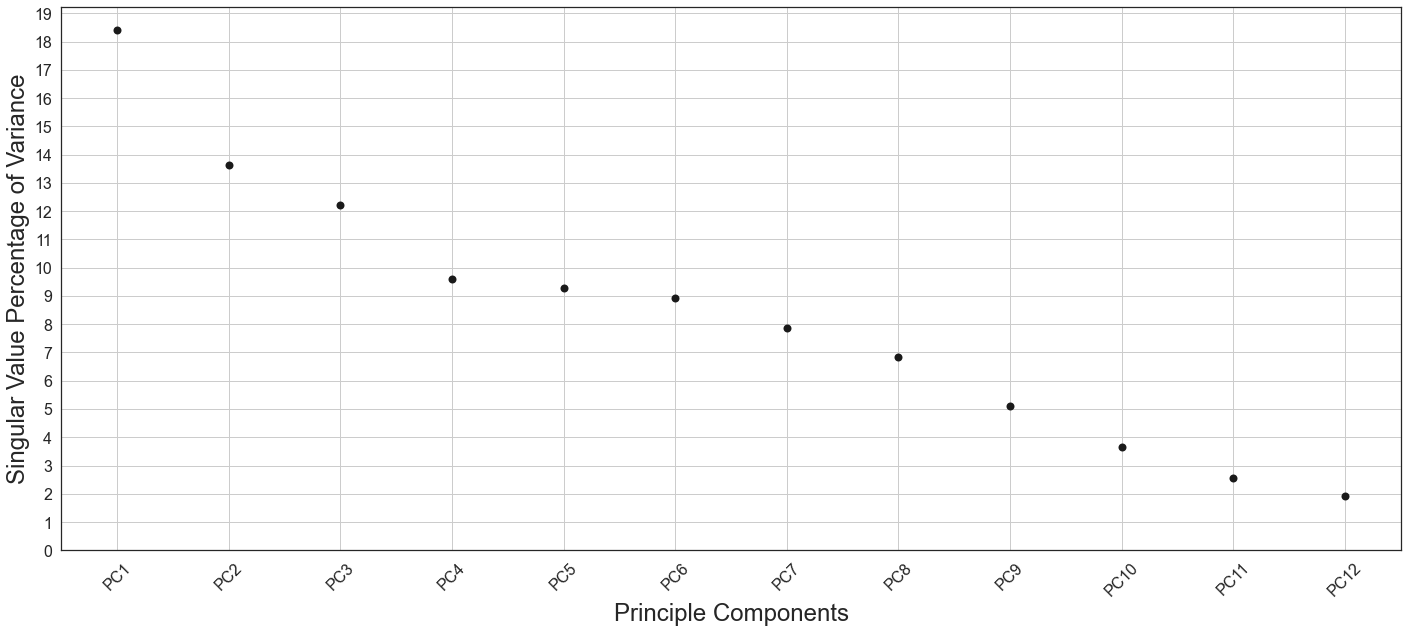

In [27]:
feat_df = data_df.drop('TradePrice',axis=1)
PCA(feat_df,return_values = False, show_summary=True)

# Conclusion
    Every principle component of the continuous features constitute a decent portion of the variance. Even the smallest singular value comprises 2% of the variance. Therefore, the dimensionality of the feature matrix Should not be reduced. 

In [24]:
# organize the column (output first then continous columns then discrete features)
df = df[["TradePrice","Area","MinTimeToNearestStation","HousingCPI","DistrictAvgPriceByQuarter","CityPlanningAvgPriceByQuarter","AreaAvgPriceByQuarter","MinTimeAvgPriceByQuarter","Year","Quarter","Type","CityPlanning","DistrictName"]]

In [25]:
df.to_csv("./Data_Frame.csv",index = False)